In [1]:
!pip install ultralytics
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 33.5 MB/s eta 0:00:00


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive, files
from ultralytics import YOLO
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
def load_model(model_path: str = "yolo11n.pt") -> YOLO:
    """Load the YOLO model"""
    return YOLO(model_path)

In [5]:
def train_model(
    model: YOLO,
    data_yaml: str = "data.yaml",
    epochs: int = 100,
    image_size: int = 640,
    batch_size: int = 16
) -> None:
    """Train the YOLO model with specified parameters"""
    model.train(
        data=data_yaml,
        epochs=epochs,
        imgsz=image_size,
        batch=batch_size
    )

In [6]:
def validate_model(model: YOLO, data_yaml: str = "data.yaml"):
    """Validate the model and return metrics"""
    return model.val(data=data_yaml)

In [7]:
def print_overall_metrics(metrics):
    """Print overall model performance metrics"""
    print(f"mAP50-95: {metrics.box.map}")
    print(f"mAP50: {metrics.box.map50}")
    print(f"mAP75: {metrics.box.map75}")
    print(f"mAP50-95 for each category: {metrics.box.maps}")

In [8]:
def print_per_class_metrics(metrics, model_names):
    """Print detailed metrics for each class"""
    print("\nPer-class metrics:")
    for i, name in enumerate(model_names):
        print(f"{name}:")
        print(f"Precision: {metrics.box.p[i]}")
        print(f"Recall: {metrics.box.r[i]}")
        print(f"mAP50: {metrics.box.ap50[i]}")
        print(f"mAP50-95: {metrics.box.ap[i]}\n")

In [9]:
def evaluate_model(model: YOLO):
    """Complete model evaluation workflow"""
    metrics = validate_model(model)
    print_overall_metrics(metrics)
    print_per_class_metrics(metrics, model.names)
    return metrics

In [10]:
def main():
    # Initialize model
    model = load_model()

    # Train model
    train_model(model)

    # Evaluate model
    metrics = evaluate_model(model)

In [12]:
if __name__ == "__main__":
    main()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 63.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/dataset/labels/train.cache... 200 images, 2 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset/labels/val.cache... 30 images, 1 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.447      4.752       1.36         14        640: 100%|██████████| 13/13 [02:48<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.25s/it]

                   all         30         52   0.000444     0.0877    0.00277    0.00111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.313      3.662      1.249         15        640: 100%|██████████| 13/13 [02:39<00:00, 12.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.38s/it]

                   all         30         52   0.000585       0.12     0.0369     0.0245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.186      2.988      1.175          8        640: 100%|██████████| 13/13 [02:39<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.43s/it]

                   all         30         52    0.00126      0.118     0.0616      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.176       2.39      1.156         16        640: 100%|██████████| 13/13 [02:39<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]

                   all         30         52    0.00154      0.198     0.0967     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.199      2.209      1.193         17        640: 100%|██████████| 13/13 [02:37<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.70s/it]

                   all         30         52    0.00225      0.381      0.258      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.147      1.977      1.144         15        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.80s/it]

                   all         30         52    0.00184      0.393      0.142      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.162      1.953      1.182         24        640: 100%|██████████| 13/13 [02:39<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.44s/it]

                   all         30         52    0.00223      0.464      0.394      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.251      2.024      1.172         21        640: 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.63s/it]

                   all         30         52      0.995      0.271      0.521      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.176      1.783       1.21         18        640: 100%|██████████| 13/13 [02:39<00:00, 12.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.57s/it]

                   all         30         52      0.954       0.44      0.555      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.112      1.704      1.195         11        640: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.36s/it]

                   all         30         52      0.944      0.472      0.544       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.255      1.866      1.229         12        640: 100%|██████████| 13/13 [02:38<00:00, 12.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.95s/it]

                   all         30         52      0.889      0.563      0.566      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.169      1.653      1.179         13        640: 100%|██████████| 13/13 [02:37<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.68s/it]

                   all         30         52      0.987      0.458       0.58      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.165      1.562       1.24         10        640: 100%|██████████| 13/13 [02:38<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.95s/it]

                   all         30         52      0.752      0.563      0.486      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.141      1.523      1.198          8        640: 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.88s/it]

                   all         30         52      0.797       0.47      0.514      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.134      1.371      1.198         14        640: 100%|██████████| 13/13 [02:34<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.60s/it]

                   all         30         52      0.909      0.531      0.549      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.165      1.405      1.231         18        640: 100%|██████████| 13/13 [02:35<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.51s/it]

                   all         30         52      0.957      0.559      0.594      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.061      1.288      1.182         24        640: 100%|██████████| 13/13 [02:30<00:00, 11.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.25s/it]

                   all         30         52      0.977      0.563      0.596      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.104      1.431      1.241         11        640: 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.77s/it]

                   all         30         52      0.979      0.533      0.592      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G       1.11      1.289      1.183         12        640: 100%|██████████| 13/13 [02:36<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.65s/it]

                   all         30         52      0.911       0.53      0.583      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.056      1.136      1.169         21        640: 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.78s/it]

                   all         30         52      0.899       0.54      0.573      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.118      1.203      1.191         19        640: 100%|██████████| 13/13 [02:32<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         30         52      0.951      0.567      0.584      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.035      1.139        1.2         11        640: 100%|██████████| 13/13 [02:38<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.59s/it]

                   all         30         52      0.955      0.585      0.601      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.054      1.071      1.153         13        640: 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all         30         52       0.98      0.562      0.593      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.066      1.132      1.197         12        640: 100%|██████████| 13/13 [02:40<00:00, 12.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]

                   all         30         52      0.984      0.579      0.606      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.062      1.135      1.184         17        640: 100%|██████████| 13/13 [02:34<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.08s/it]

                   all         30         52       0.94      0.574      0.607      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.035     0.9994      1.178         12        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.82s/it]

                   all         30         52      0.959      0.595      0.598      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.087      1.027      1.176         24        640: 100%|██████████| 13/13 [02:39<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.61s/it]

                   all         30         52      0.958      0.582      0.597       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.011     0.9585      1.134         16        640: 100%|██████████| 13/13 [02:38<00:00, 12.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]

                   all         30         52      0.961      0.576      0.622      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.058      1.004      1.144         19        640: 100%|██████████| 13/13 [02:38<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.82s/it]

                   all         30         52      0.938      0.628      0.635      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.007     0.9397      1.156          8        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.60s/it]

                   all         30         52      0.971      0.574      0.624      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.9744     0.9071      1.136         13        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.79s/it]

                   all         30         52      0.952      0.572      0.596      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.022     0.8859       1.13         12        640: 100%|██████████| 13/13 [02:41<00:00, 12.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.03s/it]

                   all         30         52      0.985      0.581      0.619      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.019       0.99      1.176          6        640: 100%|██████████| 13/13 [02:31<00:00, 11.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.41s/it]

                   all         30         52      0.978      0.585      0.617      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.002     0.9146      1.144         24        640: 100%|██████████| 13/13 [02:33<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]

                   all         30         52      0.983      0.586      0.612      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.9853     0.8652      1.162         20        640: 100%|██████████| 13/13 [02:33<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.11s/it]

                   all         30         52      0.982      0.574      0.605      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.9969     0.8483      1.127         10        640: 100%|██████████| 13/13 [02:33<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.72s/it]

                   all         30         52      0.956      0.574      0.616      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.007     0.8246       1.13         18        640: 100%|██████████| 13/13 [02:32<00:00, 11.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]

                   all         30         52      0.959      0.585      0.622      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      0.964     0.8358      1.118         12        640: 100%|██████████| 13/13 [02:33<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]

                   all         30         52       0.95      0.585      0.618      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.036     0.8366      1.145         15        640: 100%|██████████| 13/13 [02:33<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         30         52      0.945      0.574      0.614      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.9138      0.762      1.091         12        640: 100%|██████████| 13/13 [02:31<00:00, 11.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.12s/it]

                   all         30         52      0.946      0.574      0.622      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.9907     0.8197      1.146         12        640: 100%|██████████| 13/13 [02:30<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.67s/it]

                   all         30         52      0.936      0.574      0.613      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.021     0.8226      1.163         18        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.56s/it]

                   all         30         52      0.959      0.571      0.615      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.9664     0.7804      1.154         18        640: 100%|██████████| 13/13 [02:32<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.21s/it]

                   all         30         52      0.965      0.572      0.611      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      0.897     0.7352      1.123         14        640: 100%|██████████| 13/13 [02:36<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]

                   all         30         52      0.914      0.603      0.629      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.9842     0.7543      1.115         18        640: 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.99s/it]

                   all         30         52      0.942      0.598      0.623      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.9661     0.7418      1.129         11        640: 100%|██████████| 13/13 [02:37<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.21s/it]

                   all         30         52       0.92      0.607      0.622       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.019     0.7883      1.111         12        640: 100%|██████████| 13/13 [02:35<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.98s/it]

                   all         30         52      0.933      0.599       0.63      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.9508     0.7318      1.123         12        640: 100%|██████████| 13/13 [02:40<00:00, 12.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.29s/it]

                   all         30         52      0.934      0.593      0.638      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.9246     0.7193      1.113         22        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.00s/it]

                   all         30         52      0.955      0.617      0.642      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.9383     0.7318      1.093         13        640: 100%|██████████| 13/13 [02:40<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.91s/it]

                   all         30         52      0.945      0.614      0.637      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.028     0.7656       1.16         17        640: 100%|██████████| 13/13 [02:34<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.21s/it]

                   all         30         52      0.949      0.617      0.646      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.8974      0.661      1.102         22        640: 100%|██████████| 13/13 [02:41<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.87s/it]

                   all         30         52      0.981      0.596      0.656      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.9185     0.7021      1.112          9        640: 100%|██████████| 13/13 [02:38<00:00, 12.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.12s/it]

                   all         30         52      0.942      0.618      0.642      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.9478     0.7464      1.143         16        640: 100%|██████████| 13/13 [02:37<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.86s/it]

                   all         30         52      0.952        0.6      0.639      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.015     0.7462      1.085         20        640: 100%|██████████| 13/13 [02:34<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.63s/it]

                   all         30         52      0.979      0.589      0.644      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.9319     0.7211      1.116         25        640: 100%|██████████| 13/13 [02:36<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.23s/it]

                   all         30         52      0.974      0.575      0.616      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.9093     0.6647      1.085         10        640: 100%|██████████| 13/13 [02:35<00:00, 11.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.69s/it]

                   all         30         52      0.949      0.579      0.633      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      0.956     0.6865      1.107         15        640: 100%|██████████| 13/13 [02:33<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.29s/it]

                   all         30         52      0.933       0.58      0.638       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.8945     0.6442       1.09         13        640: 100%|██████████| 13/13 [02:34<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.56s/it]

                   all         30         52      0.959      0.585      0.631      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.9055      0.653      1.152          9        640: 100%|██████████| 13/13 [02:35<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.74s/it]

                   all         30         52      0.696       0.58      0.633      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.9102     0.6387      1.096         17        640: 100%|██████████| 13/13 [02:37<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.30s/it]

                   all         30         52      0.675      0.601      0.633      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.8552     0.6096      1.071         14        640: 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.09s/it]

                   all         30         52      0.744      0.608      0.613      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.8716     0.6273      1.082         12        640: 100%|██████████| 13/13 [02:39<00:00, 12.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.15s/it]

                   all         30         52      0.986      0.556      0.615      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.9237     0.6483       1.08         32        640: 100%|██████████| 13/13 [02:34<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.33s/it]

                   all         30         52      0.987      0.576       0.61       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.8909     0.6443      1.103         18        640: 100%|██████████| 13/13 [02:33<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.20s/it]

                   all         30         52      0.971      0.585      0.628      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.9381     0.6606      1.124          5        640: 100%|██████████| 13/13 [02:33<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.83s/it]

                   all         30         52      0.986      0.565      0.632      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.8816     0.6243      1.087         14        640: 100%|██████████| 13/13 [02:36<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.76s/it]

                   all         30         52      0.968       0.57      0.631      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.9227     0.6387      1.069         13        640: 100%|██████████| 13/13 [02:39<00:00, 12.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.33s/it]

                   all         30         52      0.735      0.587      0.634      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.8716     0.6286      1.053         13        640: 100%|██████████| 13/13 [02:37<00:00, 12.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]

                   all         30         52      0.721      0.563      0.633      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.8699     0.5994      1.064         25        640: 100%|██████████| 13/13 [02:36<00:00, 12.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.67s/it]

                   all         30         52      0.968      0.563      0.628      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.8547     0.5842      1.085         11        640: 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.25s/it]

                   all         30         52      0.966       0.56      0.629       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.8723     0.6028      1.087         19        640: 100%|██████████| 13/13 [02:31<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.52s/it]

                   all         30         52      0.976       0.56      0.614      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.8673     0.5895      1.049         25        640: 100%|██████████| 13/13 [02:37<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         30         52      0.968      0.564      0.619       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.8971     0.5907      1.084          6        640: 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.64s/it]

                   all         30         52      0.728      0.581      0.645      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.8726     0.5675       1.08         11        640: 100%|██████████| 13/13 [02:40<00:00, 12.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.85s/it]

                   all         30         52      0.688      0.601      0.641      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.8321     0.5509      1.036         13        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.57s/it]

                   all         30         52      0.709      0.617      0.644      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.8616     0.5553      1.068         22        640: 100%|██████████| 13/13 [02:36<00:00, 12.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.99s/it]

                   all         30         52      0.685      0.624      0.641      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.8395     0.5484      1.074         15        640: 100%|██████████| 13/13 [02:33<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.35s/it]

                   all         30         52      0.721      0.604       0.64      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.8149     0.5564      1.046          9        640: 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.83s/it]

                   all         30         52      0.687      0.614      0.639      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.8168      0.516      1.058         20        640: 100%|██████████| 13/13 [02:35<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.83s/it]

                   all         30         52      0.978      0.588       0.64      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.8577     0.5956      1.064         11        640: 100%|██████████| 13/13 [02:31<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.68s/it]

                   all         30         52      0.934      0.612      0.636      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.8502     0.5783      1.058         21        640: 100%|██████████| 13/13 [02:33<00:00, 11.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.69s/it]

                   all         30         52      0.979      0.575      0.618       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.8821     0.5938      1.058         15        640: 100%|██████████| 13/13 [02:36<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.71s/it]

                   all         30         52      0.956      0.604      0.639      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.8509     0.5508      1.072         12        640: 100%|██████████| 13/13 [02:36<00:00, 12.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.66s/it]

                   all         30         52      0.718      0.592      0.647      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.7627     0.5141      1.036         16        640: 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.69s/it]

                   all         30         52      0.717      0.592      0.645      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.8609     0.5592      1.067         20        640: 100%|██████████| 13/13 [02:38<00:00, 12.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.59s/it]

                   all         30         52      0.711      0.595      0.647      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.8324     0.5537      1.044         15        640: 100%|██████████| 13/13 [02:33<00:00, 11.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.63s/it]

                   all         30         52      0.677       0.61      0.656      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.8198       0.53      1.034         11        640: 100%|██████████| 13/13 [02:34<00:00, 11.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.17s/it]

                   all         30         52      0.731       0.56      0.639      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.8271     0.5376      1.038          7        640: 100%|██████████| 13/13 [02:29<00:00, 11.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.73s/it]

                   all         30         52       0.71      0.579      0.636      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.7937      0.534      1.057         27        640: 100%|██████████| 13/13 [02:37<00:00, 12.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.89s/it]

                   all         30         52      0.709      0.577      0.636      0.432


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.8355     0.5649      1.116         10        640: 100%|██████████| 13/13 [02:35<00:00, 11.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.78s/it]

                   all         30         52      0.707      0.576       0.64      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G      0.819     0.5537      1.067         11        640: 100%|██████████| 13/13 [02:35<00:00, 11.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.69s/it]

                   all         30         52      0.983      0.575      0.649      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.8257       0.55      1.096         16        640: 100%|██████████| 13/13 [02:33<00:00, 11.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.52s/it]

                   all         30         52      0.981      0.574      0.648      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.7909     0.5298      1.065         10        640: 100%|██████████| 13/13 [02:34<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.61s/it]

                   all         30         52      0.711      0.584       0.63      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.8172     0.5724      1.082         14        640: 100%|██████████| 13/13 [02:35<00:00, 11.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

                   all         30         52      0.961      0.585      0.628      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      0.815     0.5436      1.083         13        640: 100%|██████████| 13/13 [02:31<00:00, 11.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.70s/it]

                   all         30         52      0.965      0.585      0.628      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.7838     0.5249      1.086          9        640: 100%|██████████| 13/13 [02:46<00:00, 12.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.04s/it]

                   all         30         52      0.966      0.584      0.625      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.8015     0.5377      1.088         10        640: 100%|██████████| 13/13 [02:32<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.70s/it]

                   all         30         52      0.987      0.576      0.623      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.7955     0.5155      1.058         10        640: 100%|██████████| 13/13 [02:37<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.18s/it]

                   all         30         52      0.987      0.576      0.624      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.7739     0.5235      1.046         13        640: 100%|██████████| 13/13 [02:35<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]

                   all         30         52      0.987      0.578      0.624      0.426



100 epochs completed in 4.604 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]


                   all         30         52      0.678       0.61      0.656      0.448
 Traffic Light -Green-         10         15      0.878      0.733      0.759       0.46
   Traffic Light -Off-          3          8          0          0     0.0558     0.0188
   Traffic Light -Red-         17         23      0.942      0.707      0.816      0.557
Traffic Light -Yellow-          6          6       0.89          1      0.995      0.755
Speed: 2.2ms preprocess, 271.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/dataset/labels/val.cache... 30 images, 1 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


                   all         30         52      0.678       0.61      0.656      0.448
 Traffic Light -Green-         10         15      0.878      0.733      0.759       0.46
   Traffic Light -Off-          3          8          0          0     0.0558     0.0188
   Traffic Light -Red-         17         23      0.942      0.707      0.816      0.557
Traffic Light -Yellow-          6          6       0.89          1      0.995      0.755
Speed: 3.0ms preprocess, 205.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train22
mAP50-95: 0.4479359733843653
mAP50: 0.6563288423886314
mAP75: 0.5658895969098731
mAP50-95 for each category: [    0.46034    0.018794     0.55736     0.75524]

Per-class metrics:
0:
Precision: 0.8777574747994686
Recall: 0.7333333333333333
mAP50: 0.7588700285651506
mAP50-95: 0.4603426978728809

1:
Precision: 0.0
Recall: 0.0
mAP50: 0.05577629393667129
mAP50-95: 0.01879416140233443

2:
Precision: 0.9420343631415765
Recall: 0.70706587

In [ ]:
# downloading the model
files.download("/content/runs/detect/train17/weights/best.pt")

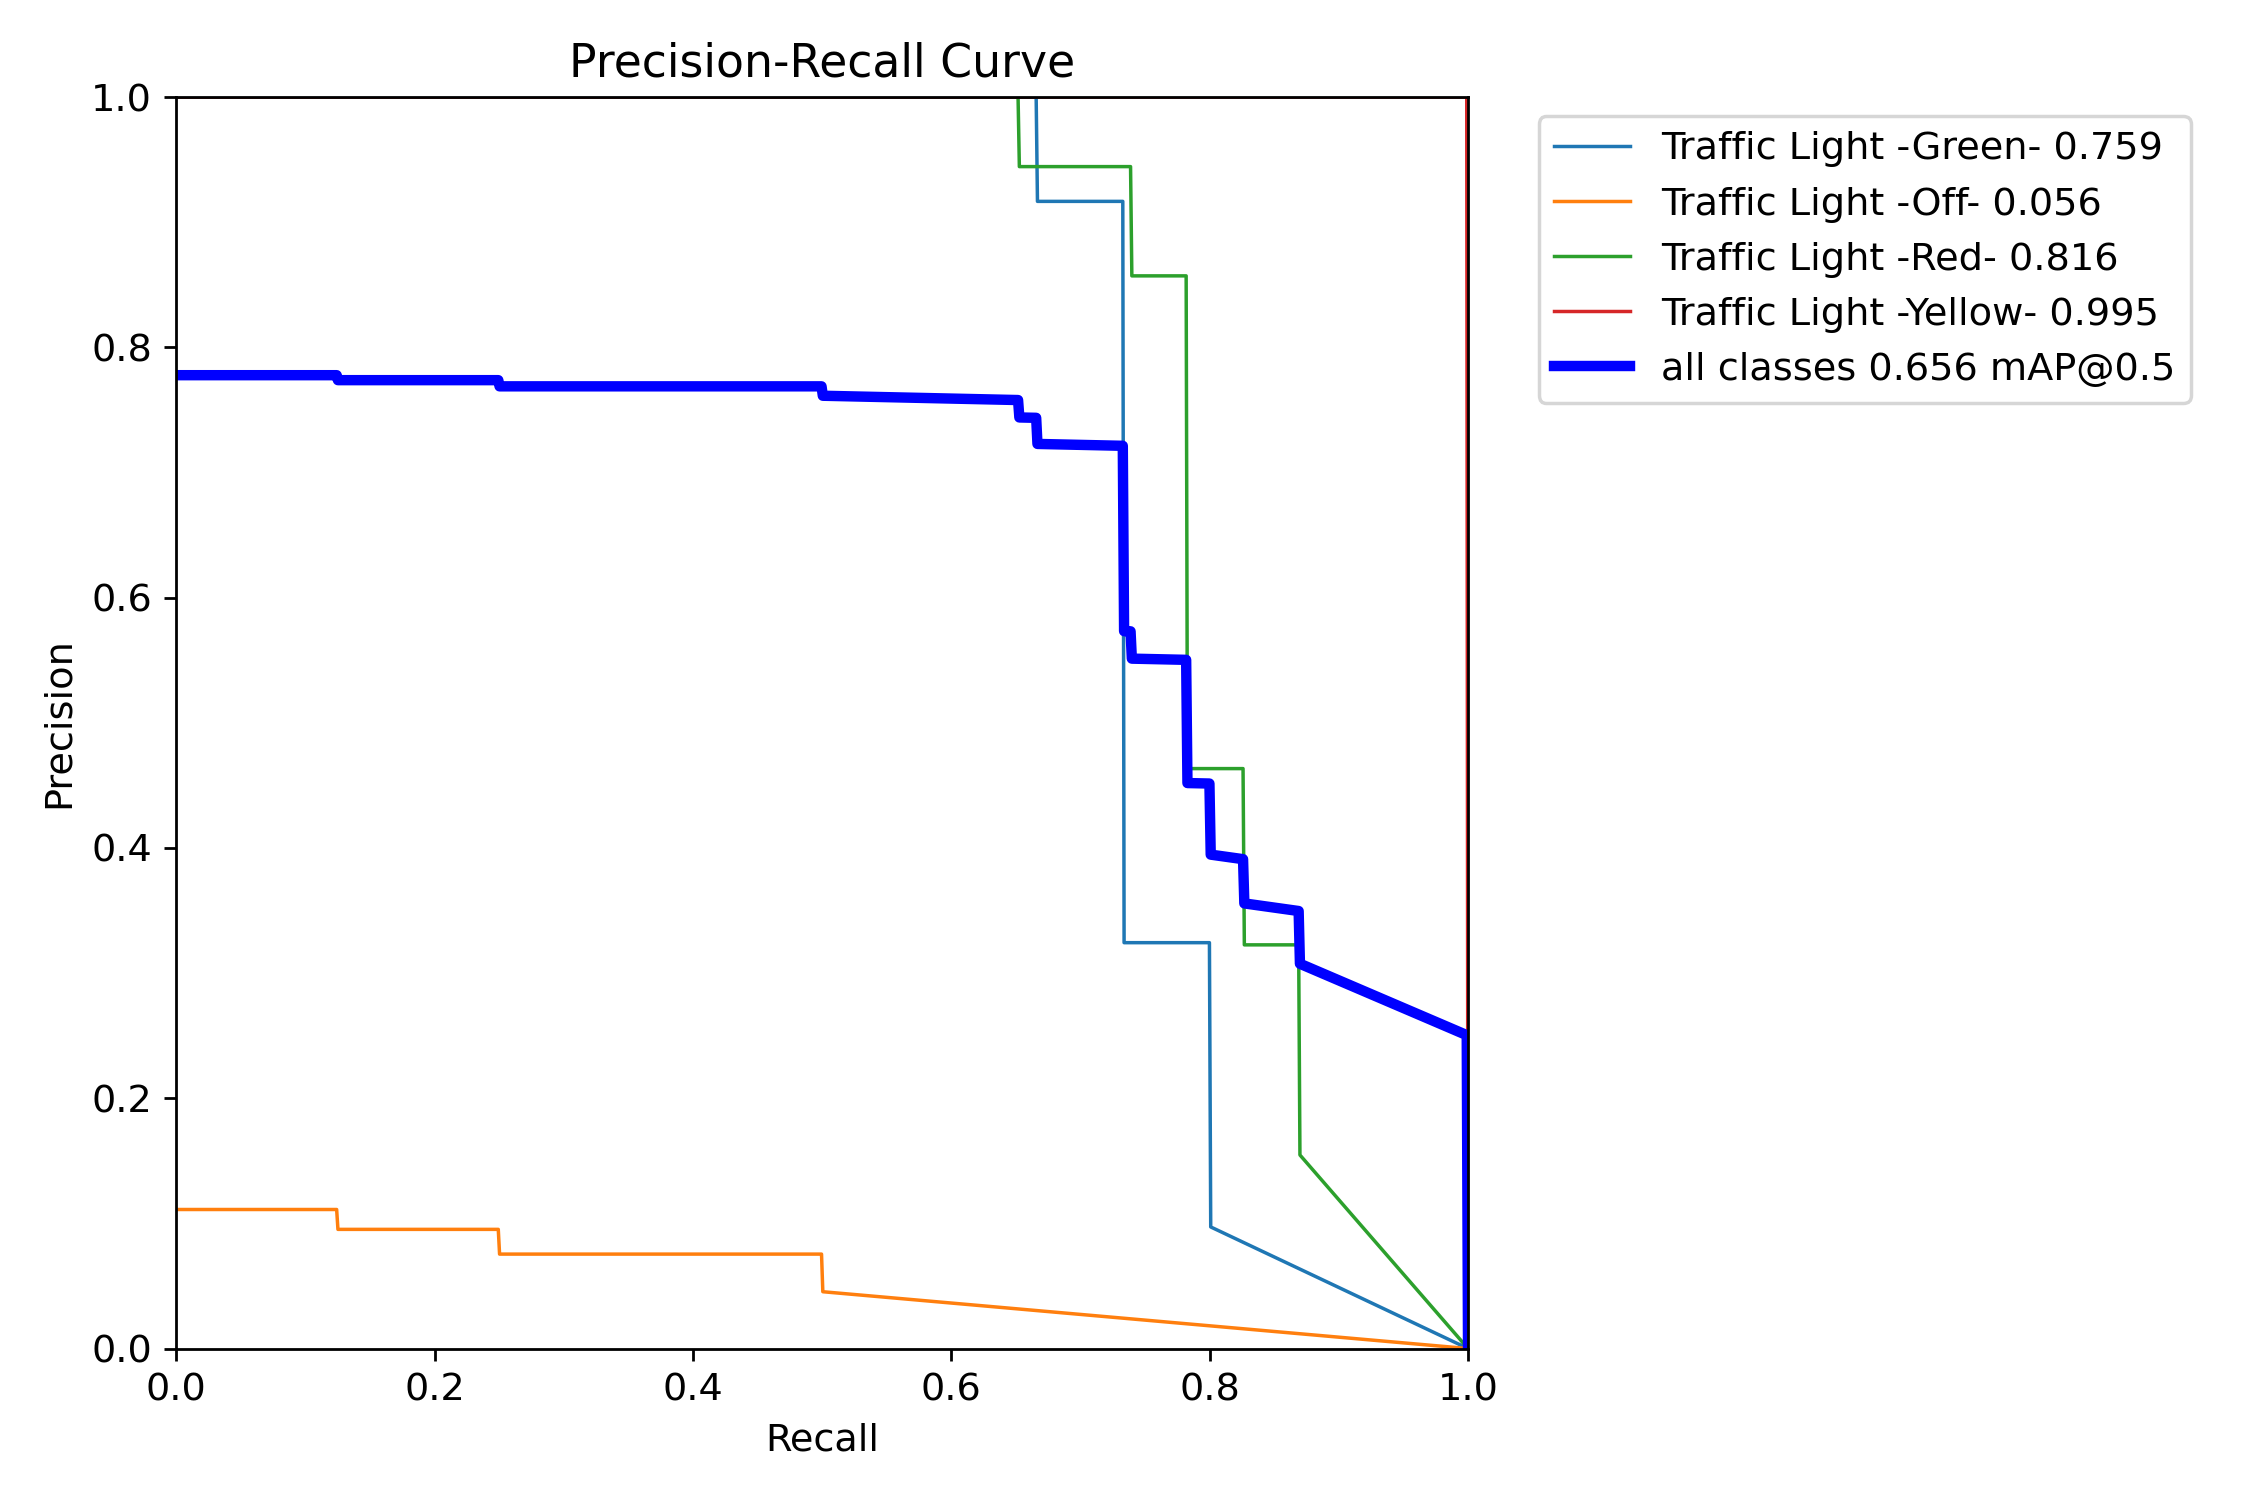

In [25]:
Image.open("/content/runs/detect/train22/PR_curve.png")

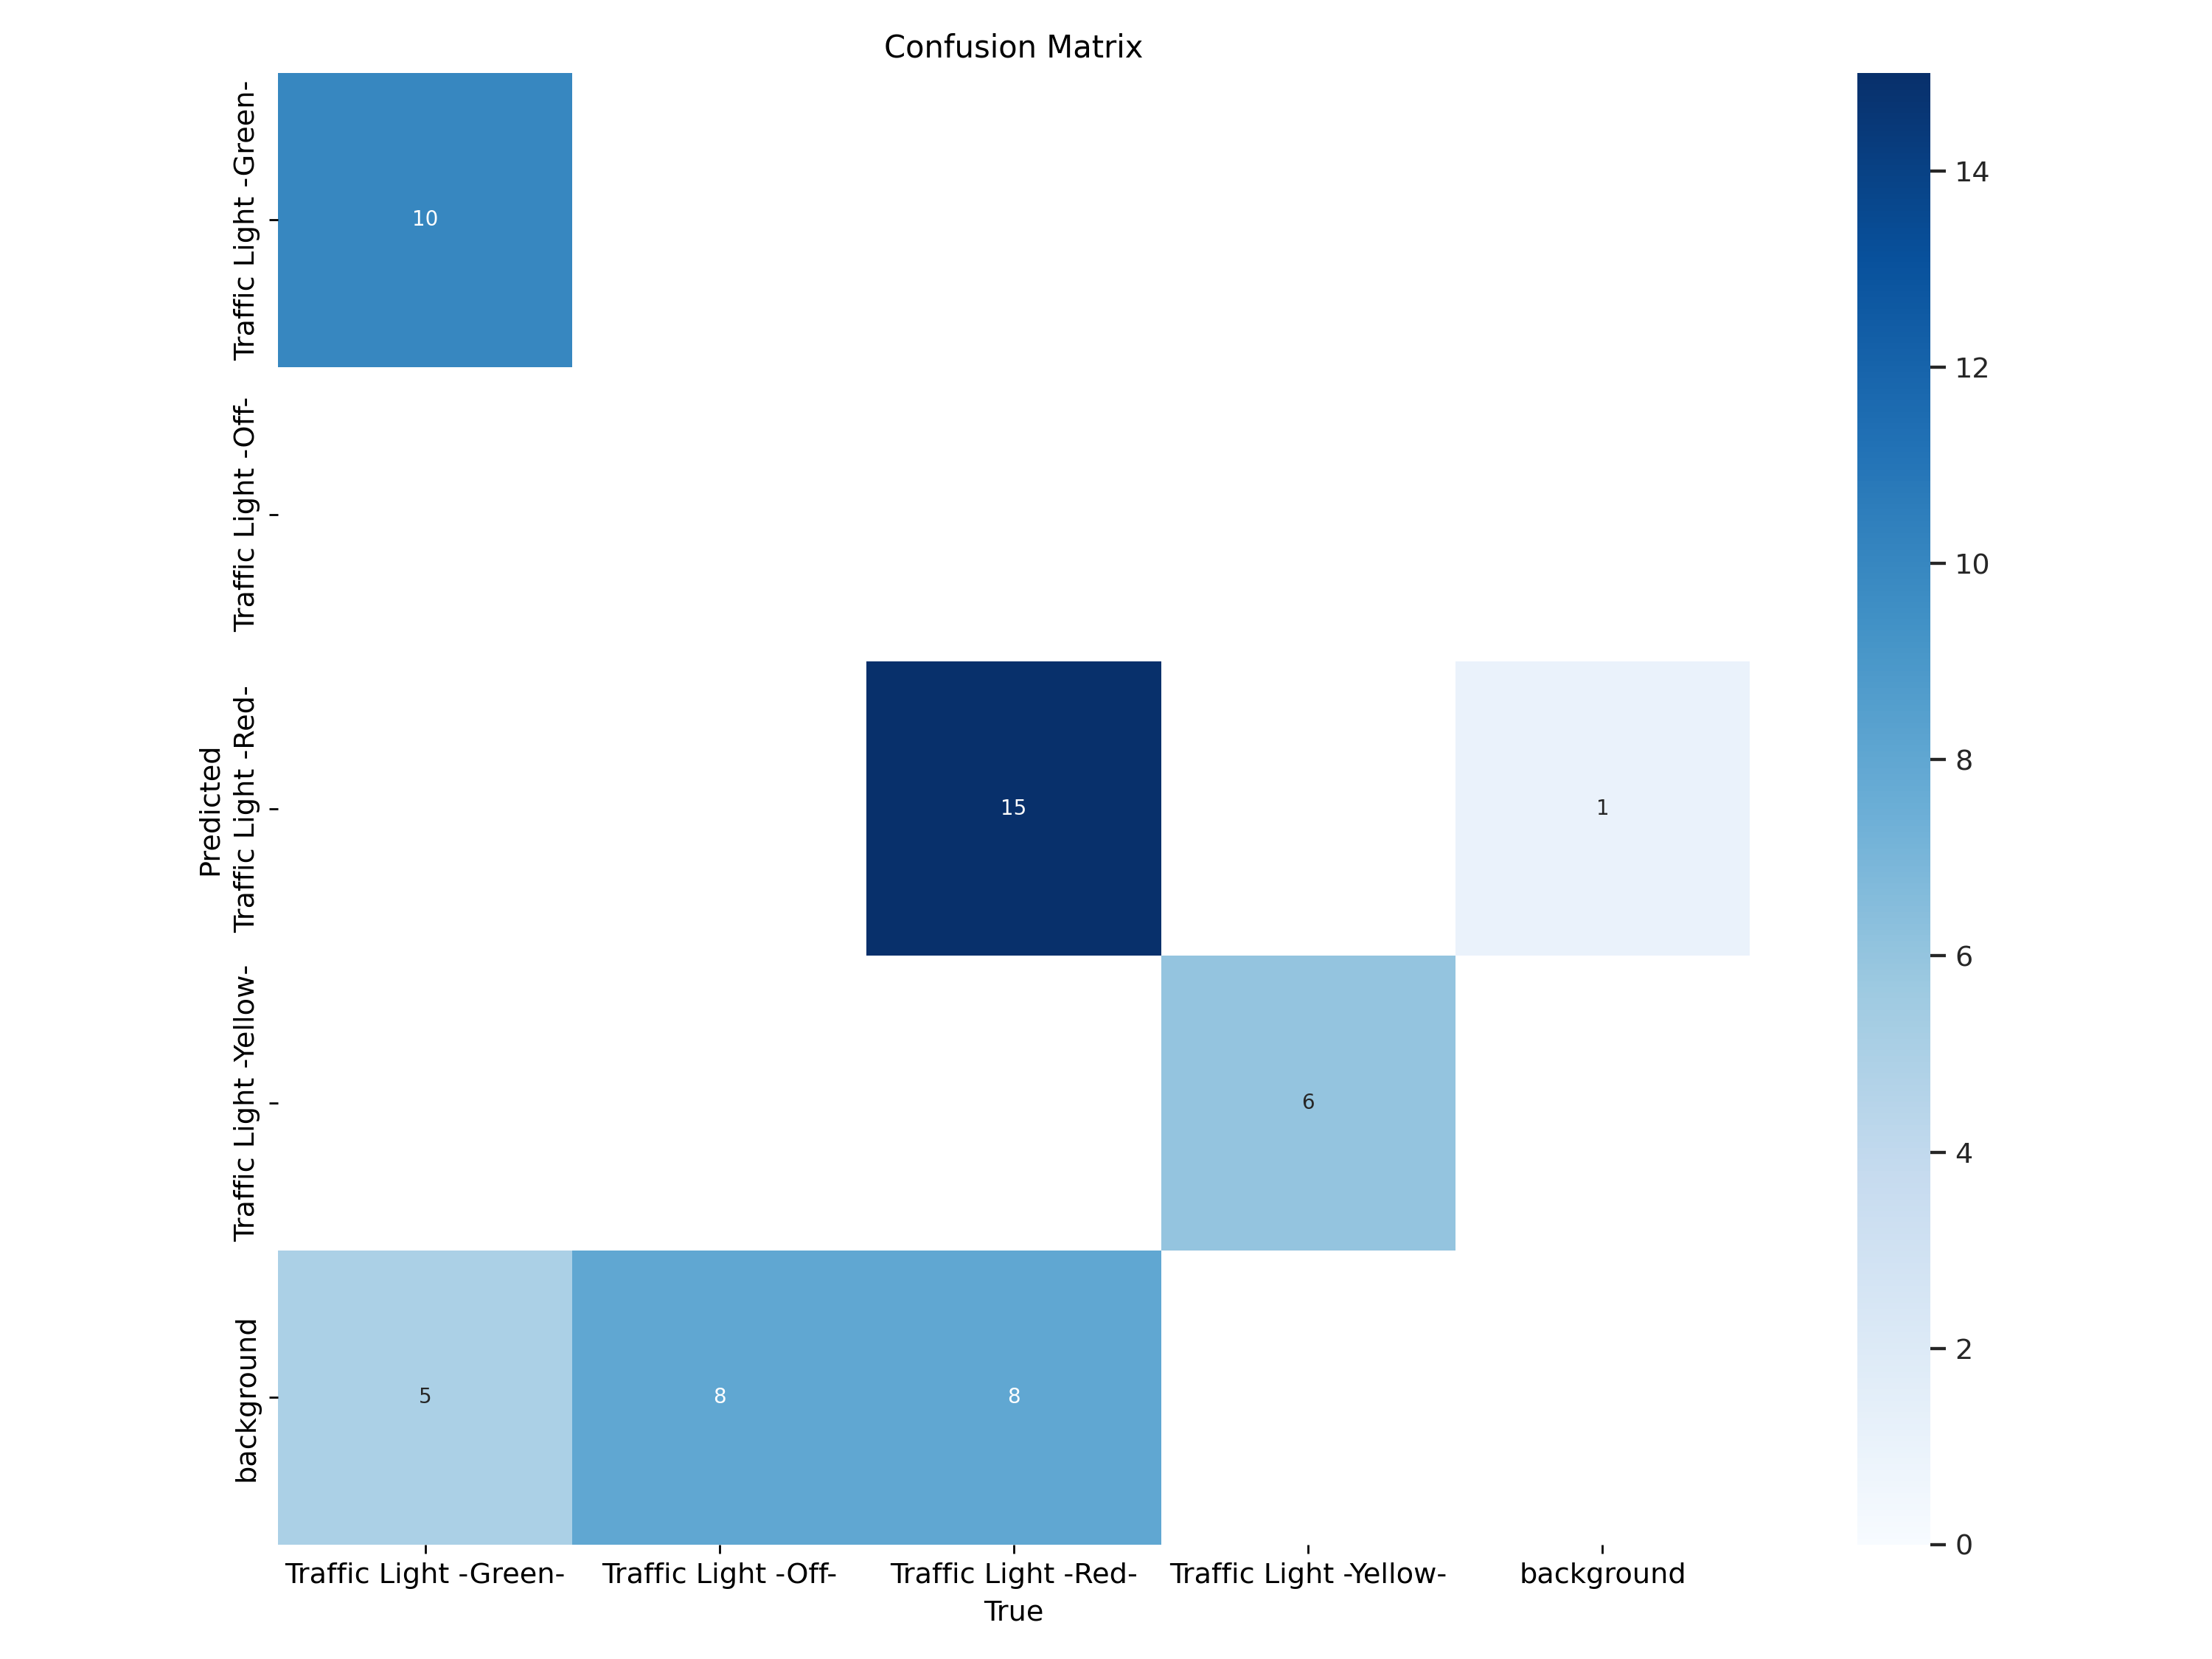

In [19]:
Image.open("/content/runs/detect/train22/confusion_matrix.png")